<a href="https://colab.research.google.com/github/purusanths/breast-cancer-wisconsin/blob/master/extended_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *ANOMALY DETECTION USING EXTENDED ISOLATION FOREST*

In [0]:
!pip install eif

In [0]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import eif as iso
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform,seed

In [0]:
import pandas as pd
import random


from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(15,6)

# Gerating data for the purpose


simulating data

In [0]:
mu, sigma, N = 0, 0.1, 1000 # mean, standard deviation, n
s = np.random.normal(mu, sigma, N)

In [0]:
random.seed(272727)
N = 1000

nx = np.random.normal(0, 0.5, N)
ny = np.random.normal(0, 0.5, N)

ax = np.random.normal(-1.5, 1, int(N*0.05))
ay = np.random.normal(1.5, 1, int(N*0.05))

A = np.array(["F", "T"])
ind = np.repeat(A, [N, N*0.05], axis=0)

#x = np.concatenate((nx,ny), axis=0)

ano_dict = {
    'x': np.concatenate((nx,ax), axis=0),
    'y': np.concatenate((ny,ay), axis=0),
    'indi': ind
}

df_ano = pd.DataFrame(data=ano_dict)
df_ano.indi = df_ano.indi.astype('category')

In [0]:
df_ano['indi'].describe()

count     1050
unique       2
top          F
freq      1000
Name: indi, dtype: object

In [0]:
df_ano['indi'].value_counts()

F    1000
T      50
Name: indi, dtype: int64

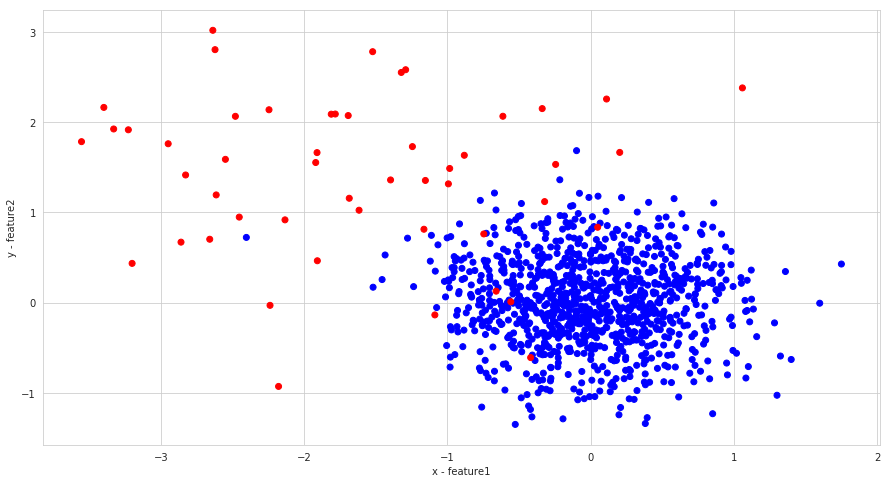

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))
colors = {'F':'blue', 'T':'red'}
ax.scatter(df_ano['x'], df_ano['y'], c=df_ano["indi"].apply(lambda x: colors[x]))
plt.xlabel('x - feature1')
plt.ylabel('y - feature2')
plt.show()

In [0]:
X=np.array(df_ano[['x', 'y']])
F2 = iso.iForest(X, ntrees=1050, sample_size=1050, ExtensionLevel=1)

In [0]:
S1 = F2.compute_paths(X_in=X)

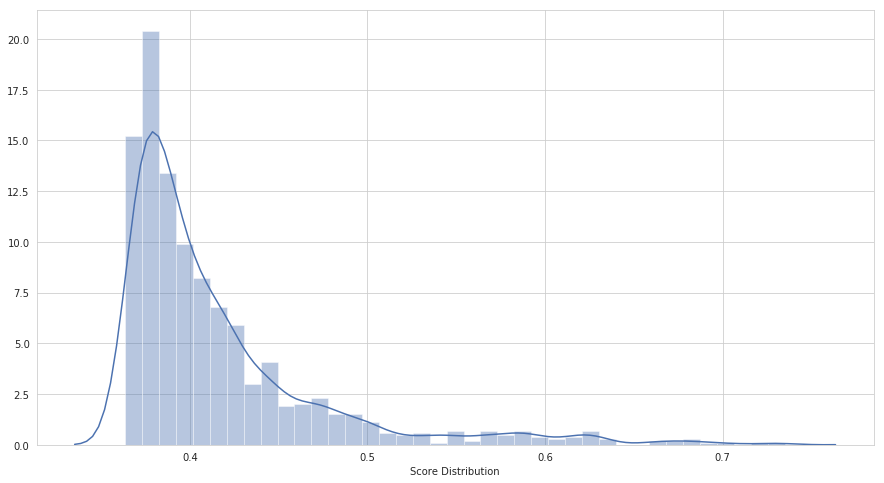

In [0]:
#f, ax1 = plt.subplots(1,2,figsize=(15,5),sharey=True)
f, ax1 = plt.subplots(figsize=(15, 8))

sb.distplot(S1, color="b", axlabel='Score Distribution')
plt.show();

In [0]:
#df_ano['anomal_y'] = model.predict(df_ano[['x', 'y']])

In [0]:
df_ano['anomal_sc'] = S1

In [0]:
df_ano.head(10)

,indi,x,y,anomal_sc
0,F,-0.981758,-0.712625,0.534872
1,F,0.474493,0.202811,0.388346
2,F,0.847127,-0.206923,0.444113
3,F,0.993373,-0.528518,0.493193
4,F,-0.256236,-0.338958,0.373886
5,F,-0.132453,-0.221222,0.366992
6,F,-0.132385,0.447740,0.379633
7,F,-0.835144,0.078159,0.408945
8,F,-0.165438,-0.332030,0.374218
9,F,0.370011,-0.101696,0.379067


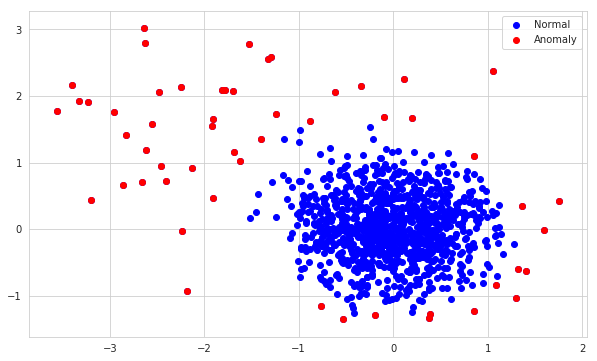

In [0]:
#### Eliminate this
fig, ax = plt.subplots(figsize=(10,6))

#a = df_ano.loc[df_ano['anomal_sc > 0.6'] == -1, ['x', 'y']] #anomaly

df_ano['P_Ano'] = np.where(df_ano['anomal_sc']>=0.55, True, False)
df_ano_1 = df_ano[df_ano.P_Ano == True]

ax.scatter(df_ano['x'], df_ano['y'], color='blue', label = 'Normal')
ax.scatter(df_ano_1['x'],df_ano_1['y'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [0]:
a = df_ano[df_ano['anomal_sc'] > 0.6] #anomaly

In [0]:
df_ano['P_Ano'] = np.where(df_ano['anomal_sc']>=0.6, True, False)

In [0]:
df_ano.head()

,cats,indi,x,y,cats_en,anomal_sc,P_Ano
0,C1,F,0.620575,0.782652,0,0.455354,False
1,C1,F,-0.640459,0.936016,0,0.501527,False
2,C1,F,-0.792046,1.041532,0,0.544510,False
3,C1,F,-1.328290,0.531226,0,0.565825,False
4,C1,F,0.211982,0.225186,0,0.393111,False


KeyError: ignored

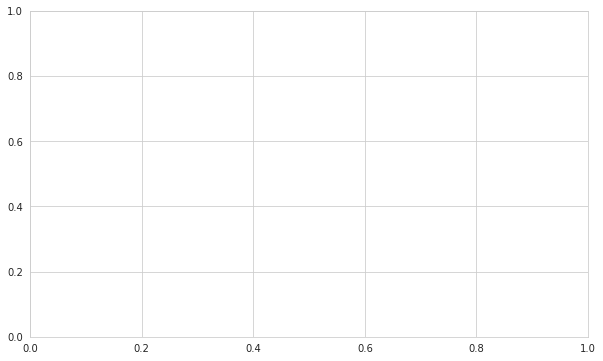

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {1:'blue', -1:'red'}
ax.scatter(df_ano['x'], df_ano['y'], c=df_ano["anomal_y"].apply(lambda x: colors[x]))
plt.xlabel('x - feature1')
plt.ylabel('y - feature2')
plt.show();

# Categorical Case

isolation forest in sklearn not support categorical values so we have to encode the values

In [0]:
# Simulate data with categories

random.seed(272727)
N = 1000

nx = np.random.normal(0, 0.5, N)
ny = np.random.normal(0, 0.5, N)

ax = np.random.normal(-1.5, 1, int(N*0.05))
ay = np.random.normal(1.5, 1, int(N*0.05))

ano_dict = {
    'x': np.concatenate((nx,ax), axis=0),
    'y': np.concatenate((ny,ay), axis=0),
    
    'cat1': np.repeat(np.array(["C1", "C2"]), [N, N*0.05], axis=0),
    'indi': np.repeat(np.array(["F", "T"]), [N, N*0.05], axis=0)
}

df_ano = pd.DataFrame(data=ano_dict)
df_ano.indi = df_ano.cat1.astype('category')


In [0]:
# Simulate data with categories
random.seed(272727)
N = 1000

n1x = np.random.normal(0, 0.5, N)
n1y = np.random.normal(0, 0.5, N)

ax = np.random.normal(-1.5, 1, int(N*0.05))
ay = np.random.normal(1.5, 1, int(N*0.05))

ano_dict = {
    'x': np.concatenate((np.random.normal(0, 0.5, N), np.random.normal(2, 1, int(N*0.05)), np.random.normal(2, 0.4, N), np.random.normal(-1, 1, int(N*0.05))), axis=0),
    'y': np.concatenate((np.random.normal(0, 0.5, N), np.random.normal(2, 1, int(N*0.05)), np.random.normal(2, 0.4, N), np.random.normal(-1, 1, int(N*0.05))), axis=0),
    'cats': np.repeat(np.array(["C1", "C2"]), [N*1.05, N*1.05], axis=0),
    'indi': np.repeat(np.array(["F", "T", "F", "T"]), [N, N*0.05, N, N*0.05], axis=0)
}

df_ano = pd.DataFrame(data=ano_dict)
df_ano.cats = df_ano.cats.astype('category')

In [0]:
df_ano.shape
df_ano.head()

,cats,indi,x,y
0,C1,F,0.620575,0.782652
1,C1,F,-0.640459,0.936016
2,C1,F,-0.792046,1.041532
3,C1,F,-1.328290,0.531226
4,C1,F,0.211982,0.225186


In [0]:
#fig, ax = plt.subplots(figsize=(15, 8), projection='3d')

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131, projection='3d')

colors = {'F':'blue', 'T':'red'}
ax.scatter(df_ano['x'], df_ano['y'], df_ano['cats'], c=df_ano["indi"].apply(lambda x: colors[x]))
plt.xlabel('x - feature1')
plt.ylabel('y - feature2')
plt.show();

ValueError: ignored

TypeError: ignored

<Figure size 1080x360 with 1 Axes>

In [0]:
# without encoding
# Cat can't be included
X=np.array(df_ano[['x', 'y', 'cats']])
F5 = iso.iForest(X, ntrees=200, sample_size=200, ExtensionLevel=1)

TypeError: ignored

In [0]:
from numpy import argmax #find the purpose
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
np.repeat(np.array(["C1", "C2", "C1", "C2"]), [10, 2, 5, 1])

array(['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2',
       'C2', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2'], dtype='<U2')

In [0]:
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']


In [0]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


In [0]:
#Apply to the dataset
label_encoder = LabelEncoder()
df_ano['cats_en'] = label_encoder.fit_transform(df_ano['cats'])

In [0]:
df_ano.head()

,cats,indi,x,y,cats_en
0,C1,F,0.620575,0.782652,0
1,C1,F,-0.640459,0.936016,0
2,C1,F,-0.792046,1.041532,0
3,C1,F,-1.328290,0.531226,0
4,C1,F,0.211982,0.225186,0


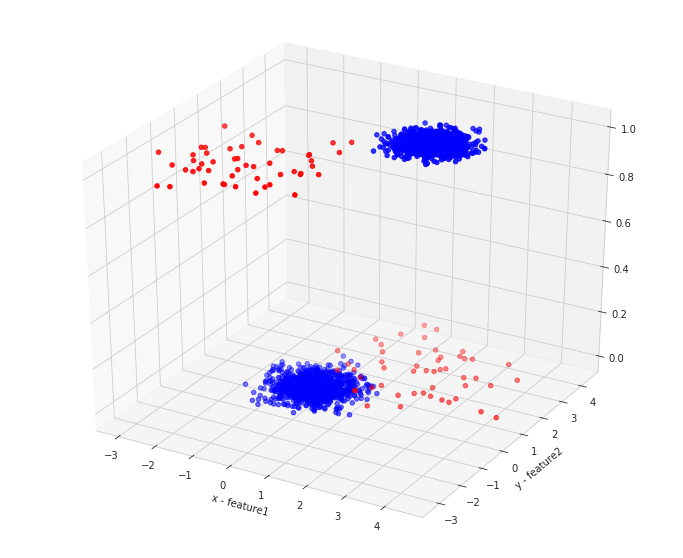

In [0]:
#fig, ax = plt.subplots(figsize=(15, 8), projection='3d')

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

colors = {'F':'blue', 'T':'red'}
ax.scatter(df_ano['x'], df_ano['y'], df_ano['cats_en'], c=df_ano["indi"].apply(lambda x: colors[x]))
plt.xlabel('x - feature1')
plt.ylabel('y - feature2')
#plt.zlabel('z - Category')
plt.show();

In [0]:
# with encoding
X=np.array(df_ano[['x', 'y', 'cats_en']])
F5 = iso.iForest(X, ntrees=200, sample_size=400, ExtensionLevel=1)

In [0]:
df_ano['anomal_sc'] = F5.compute_paths(X_in=X)

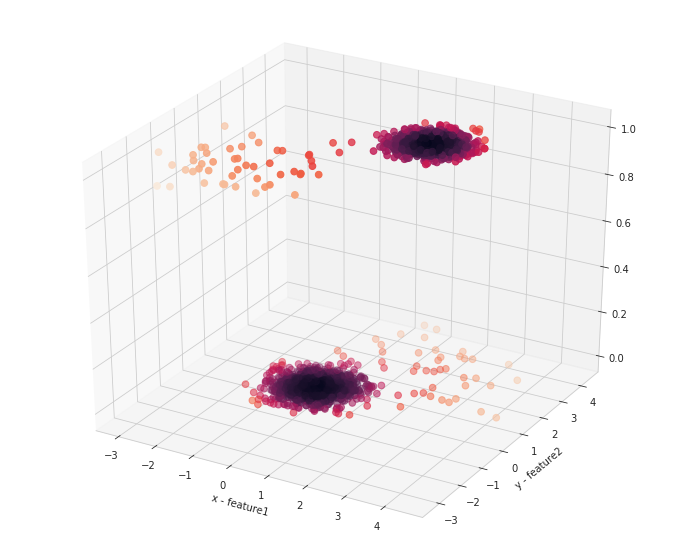

In [0]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

#colors = {'F':'blue', 'T':'red'}
ax.scatter(df_ano['x'], df_ano['y'], df_ano['cats_en'], s=45, c=df_ano["anomal_sc"])
plt.xlabel('x - feature1')
plt.ylabel('y - feature2')
#plt.zlabel('z - Category')
plt.show();

In [0]:
#Apply to the dataset
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_ano['cats'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#df_ano['V1'], df_ano['V2'], df_ano['V3'] = onehot_encoder.fit_transform(integer_encoded)
#print(df_ano['V1', 'V2', 'V3'])

In [0]:
onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [0]:
integer_encoded[1:]

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])